Cleaned column names: Index(['area', 'price'], dtype='object')

Area, Actual Price, and Predicted Price:
   area   price  Predicted_Price
0  2600  550000    533664.383562
1  3000  565000    587979.452055
2  3200  610000    615136.986301
3  3600  680000    669452.054795
4  4000  725000    723767.123288

Predicted prices for new areas:
Area: 5000 sqr ft, Predicted Price: 859554.79
Area: 8000 sqr ft, Predicted Price: 1266917.81
Area: 9000 sqr ft, Predicted Price: 1402705.48


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


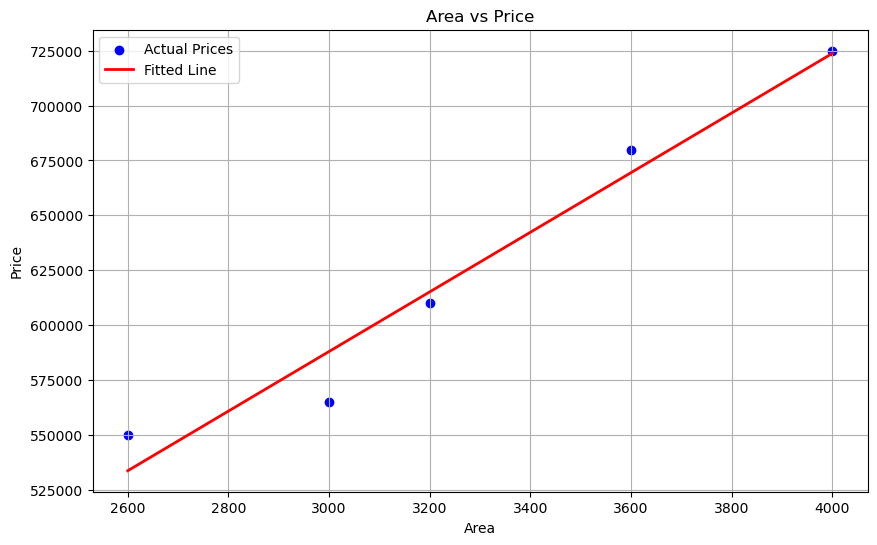

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the dataset
file_name = 'homeprices.xlsx'  # Replace with your file name
data = pd.read_excel(file_name)
# Clean column names by stripping extra spaces
data.columns = data.columns.str.strip()
# Print cleaned column names to verify
print("Cleaned column names:", data.columns)
# Check for missing values and handle them
if data[['area', 'price']].isnull().sum().any():
    print("\nMissing values found. Dropping rows with missing values...")
    data = data.dropna(subset=['area', 'price'])
# Ensure 'area' and 'price' are numeric
data['area'] = pd.to_numeric(data['area'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
# Remove rows with any remaining invalid data
data = data.dropna(subset=['area', 'price'])
# Prepare the data
X = data[['area']]  # Independent variable
y = data['price']   # Dependent variable
# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)
# Predict prices for the given areas
predicted_prices = model.predict(X)
# Add predicted prices to the DataFrame
data['Predicted_Price'] = predicted_prices
# Display the table with original and predicted prices
print("\nArea, Actual Price, and Predicted Price:")
print(data[['area', 'price', 'Predicted_Price']])
# Predict the price for new areas
new_areas = [5000, 8000, 9000]  # Areas for prediction
predicted_prices_new = model.predict([[area] for area in new_areas])
# Display the predicted prices for the new areas
print("\nPredicted prices for new areas:")
for area, predicted_price in zip(new_areas, predicted_prices_new):
    print(f"Area: {area} sqr ft, Predicted Price: {predicted_price:.2f}")
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['price'], color='blue', label='Actual Prices')
plt.plot(data['area'], predicted_prices, color='red', linewidth=2, label='Fitted Line')
# Label the plot
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
# Show the plot
plt.grid(True)
plt.show()
